In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm

In [2]:
!curl -O https://lazyprogrammer.me/course_files/sp500sub.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  1 24.2M    1  254k    0     0   102k      0  0:04:02  0:00:02  0:04:00  102k
  5 24.2M    5 1262k    0     0   368k      0  0:01:07  0:00:03  0:01:04  368k
 17 24.2M   17 4238k    0     0   957k      0  0:00:25  0:00:04  0:00:21  957k
 29 24.2M   29 7454k    0     0  1371k      0  0:00:18  0:00:05  0:00:13 1497k
 42 24.2M   42 10.3M    0     0  1646k      0  0:00:15  0:00:06  0:00:09 2131k
 52 24.2M   52 12.6M    0     0  1749k      0  0:00:14  0:00:07  0:00:07 2574k
 62 24.2M   62 15.2M    0     0  1857k      0  0:00:13  0:00:08  0:00:05 2878k
 73 24.2M   73 17.8M    0     0  1942k      0  0:00

In [3]:
df=pd.read_csv('sp500sub.csv',index_col='Date',parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [4]:
goog=df[df['Name']=='GOOG'][['Close']].copy()

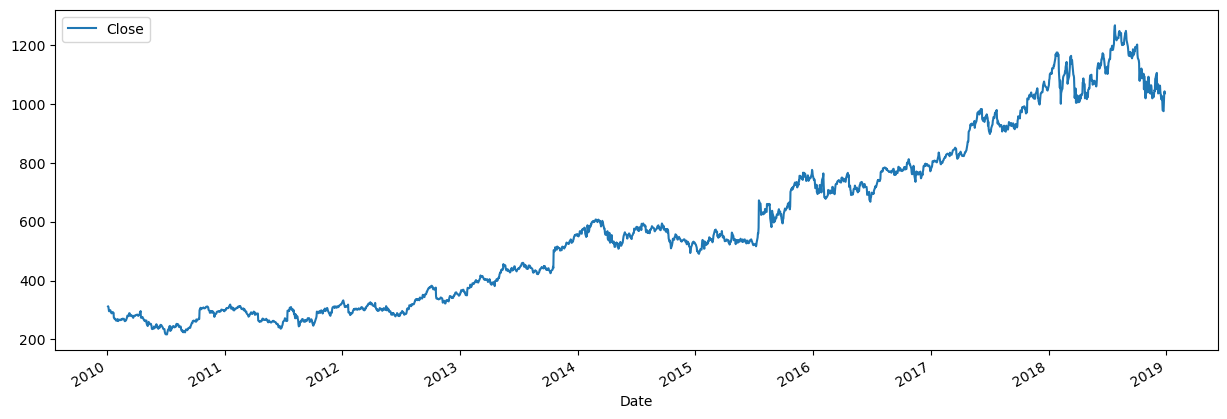

In [5]:
goog.plot(figsize=(15,5));

In [6]:
Ntest=30
train=goog.iloc[:-Ntest]
test=goog.iloc[-Ntest:]

In [7]:
model=pm.auto_arima(train,
                    error_action='ignore',
                   trace=True,
                   suppress_warnings=True,
                    maxiter=10,
                   seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16270.771, Time=1.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16270.383, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16269.726, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16269.492, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16271.123, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16268.077, Time=0.86 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=16267.935, Time=1.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=16268.277, Time=0.84 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=16266.968, Time=1.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=16264.983, Time=0.97 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=16266.925, Time=1.35 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=16268.907, Time=1.76 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=16265.470, Time=0.38 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0] intercept
Total fit time: 10.989 seconds


In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(3, 1, 0)   Log Likelihood               -8127.491
Date:                Tue, 31 Oct 2023   AIC                          16264.983
Time:                        05:34:43   BIC                          16293.536
Sample:                             0   HQIC                         16275.409
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3104      0.198      1.571      0.116      -0.077       0.698
ar.L1          0.0378      0.012      3.152      0.002       0.014       0.061
ar.L2         -0.0410      0.013     -3.241      0.001      -0.066      -0.016
ar.L3          0.0488      0.012      4.031      0.000       0.025       0.073
sigma2        85.1623      1.033     82.421      0.000      83.137      87.187
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             11790.07
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               6.78   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
model.get_params()

{'maxiter': 10,
 'method': 'lbfgs',
 'order': (3, 1, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

In [16]:
def plot_result(model,fulldata,train,test):
    params=model.get_params()
    d=params['order'][1]
    
    train_pred=model.predict_in_sample(start=d,end=-1)
    test_pred,confint=model.predict(n_periods=Ntest,return_conf_int=True)
    
    fig,ax=plt.subplots(figsize=(10,5))
    ax.plot(fulldata.index,fulldata,label='data')
    ax.plot(train.index[d:],train_pred,label='fitted')
    ax.plot(test.index,test_pred,label='forecast')
    ax.fill_between(test.index,\
                   confint[:,0],confint[:,1],\
                   color='red',alpha=0.3)
    ax.legend();

C:\Users\asus\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\asus\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


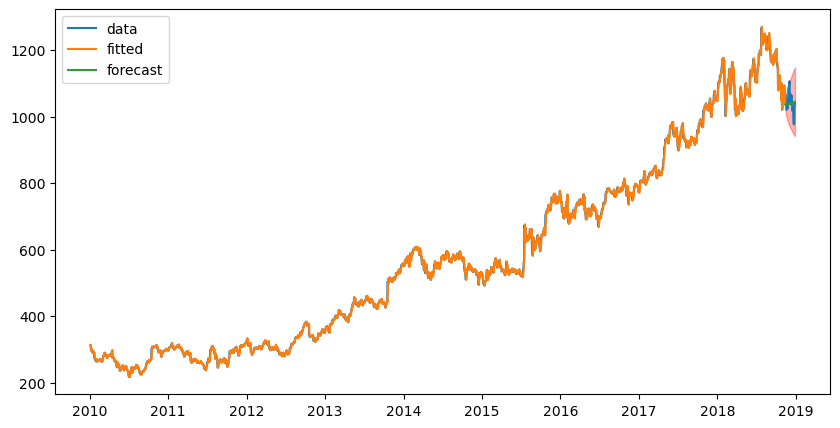

In [17]:
plot_result(model,goog,train,test)

In [18]:
def plot_test(model,test):
    test_pred,confint=model.predict(n_periods=Ntest,return_conf_int=True)
    fig,ax=plt.subplots(figsize=(10,5))
    ax.plot(test.index,test,label='true')
    ax.plot(test.index,test_pred,label='forecast')
    ax.fill_between(test.index,\
                   confint[:,0],confint[:,1],\
                   color='red',alpha=0.3)
    ax.legend();

C:\Users\asus\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\asus\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


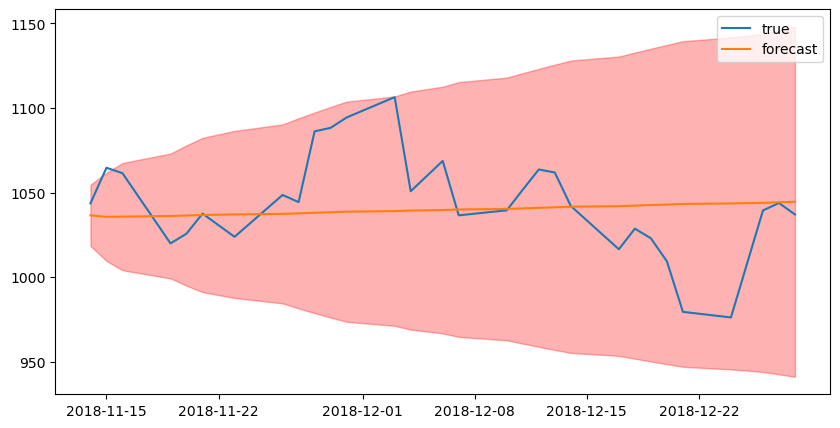

In [19]:
plot_test(model,test)

In [25]:
def rmse(y,t):
    y = np.array(y).flatten()
    t = np.array(t).flatten()
    return np.sqrt(np.mean((t-y)**2))

In [26]:
len(train.iloc[-1]),len(test)

(1, 30)

In [27]:
print('RMSE ARIMA:',rmse(model.predict(Ntest),test))
print('RMSE Naive:',rmse(train.iloc[-1],test))

RMSE ARIMA: 30.436601984675868
RMSE Naive: 30.029502477261467


C:\Users\asus\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\asus\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [28]:
aapl=df[df['Name']=='AAPL'][['Close']].copy()

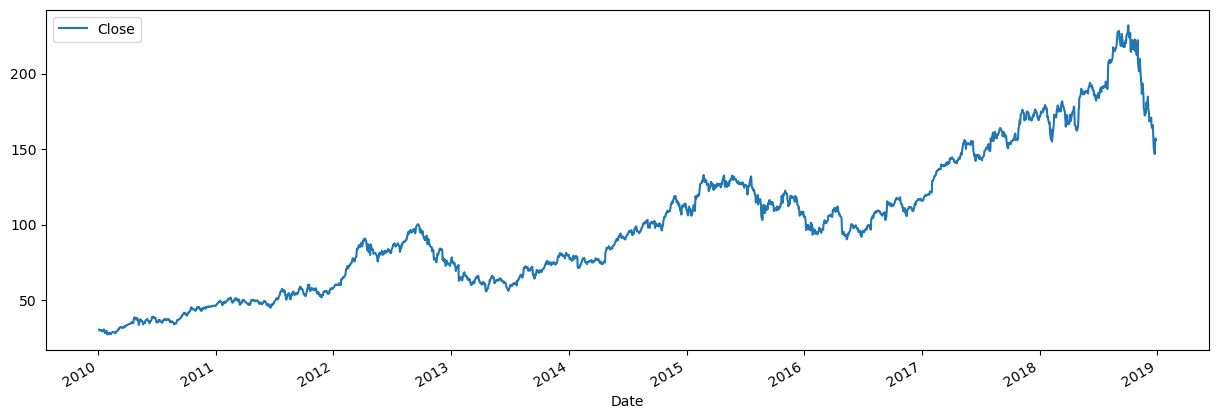

In [29]:
aapl.plot(figsize=(15,5));

In [32]:
Ntest=30
train=aapl.iloc[:-Ntest]
test=aapl.iloc[-Ntest:]

In [33]:
model=pm.auto_arima(train,
                    error_action='ignore',
                   trace=True,
                   suppress_warnings=True,
                    maxiter=10,
                   seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8570.296, Time=4.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8575.329, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8574.709, Time=0.99 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8574.392, Time=1.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8577.622, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8571.650, Time=2.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8571.332, Time=3.44 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8572.500, Time=4.36 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=8572.527, Time=5.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8574.574, Time=2.67 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=8570.852, Time=4.45 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8570.880, Time=4.30 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=8579.289, Time=5.32 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=8572.973, Time=1.97 sec

Best model:  ARIMA(2,1,2)(0,0,0)

In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -4279.148
Date:                Tue, 31 Oct 2023   AIC                           8570.296
Time:                        06:36:39   BIC                           8604.560
Sample:                             0   HQIC                          8582.808
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0803      0.042      1.896      0.058      -0.003       0.163
ar.L1          0.3755      0.165      2.279      0.023       0.053       0.699
ar.L2         -0.4239      0.176     -2.407      0.016      -0.769      -0.079
ma.L1         -0.3433      0.172     -2.002      0.045      -0.679      -0.007
ma.L2          0.3579      0.183      1.958      0.050      -0.000       0.716
sigma2         2.7182      0.039     69.453      0.000       2.642       2.795
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              6223.04
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               4.23   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
model.get_params()

{'maxiter': 10,
 'method': 'lbfgs',
 'order': (2, 1, 2),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

In [36]:
def plot_result(model,fulldata,train,test):
    params=model.get_params()
    d=params['order'][1]
    
    train_pred=model.predict_in_sample(start=d,end=-1)
    test_pred,confint=model.predict(n_periods=Ntest,return_conf_int=True)
    
    fig,ax=plt.subplots(figsize=(10,5))
    ax.plot(fulldata.index,fulldata,label='data')
    ax.plot(train.index[d:],train_pred,label='fitted')
    ax.plot(test.index,test_pred,label='forecast')
    ax.fill_between(test.index,\
                   confint[:,0],confint[:,1],\
                   color='red',alpha=0.3)
    ax.legend();

C:\Users\asus\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\asus\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


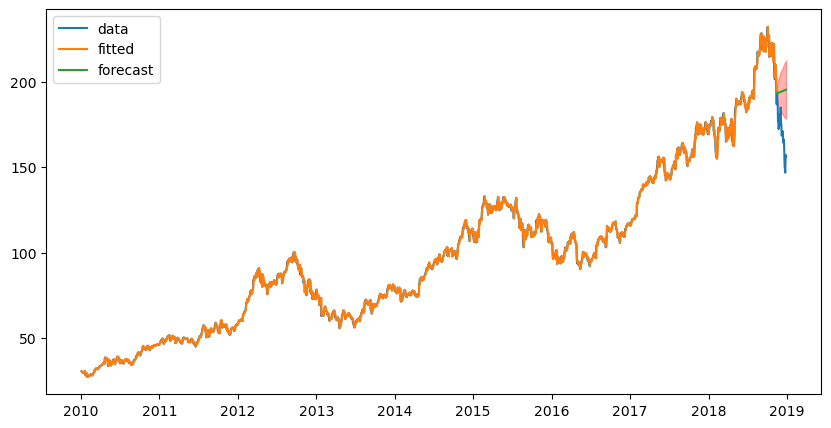

In [37]:
plot_result(model,aapl,train,test)

In [38]:
def plot_test(model,test):
    test_pred,confint=model.predict(n_periods=Ntest,return_conf_int=True)
    fig,ax=plt.subplots(figsize=(10,5))
    ax.plot(test.index,test,label='true')
    ax.plot(test.index,test_pred,label='forecast')
    ax.fill_between(test.index,\
                   confint[:,0],confint[:,1],\
                   color='red',alpha=0.3)
    ax.legend();

C:\Users\asus\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\asus\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


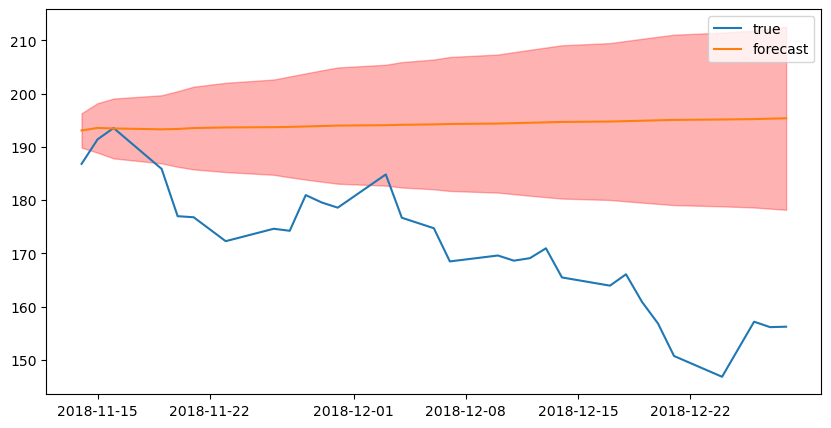

In [39]:
plot_test(model,test)

In [40]:
def rmse(y,t):
    y = np.array(y).flatten()
    t = np.array(t).flatten()
    return np.sqrt(np.mean((t-y)**2))

In [41]:
print('RMSE ARIMA:',rmse(model.predict(Ntest),test))
print('RMSE Naive:',rmse(train.iloc[-1],test))

RMSE ARIMA: 26.094958350792115
RMSE Naive: 24.02712058667382


C:\Users\asus\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\asus\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [42]:
# Means ARIMA cannot predict Extraordinary events

In [43]:
ibm=df[df['Name']=='IBM'][['Close']].copy()

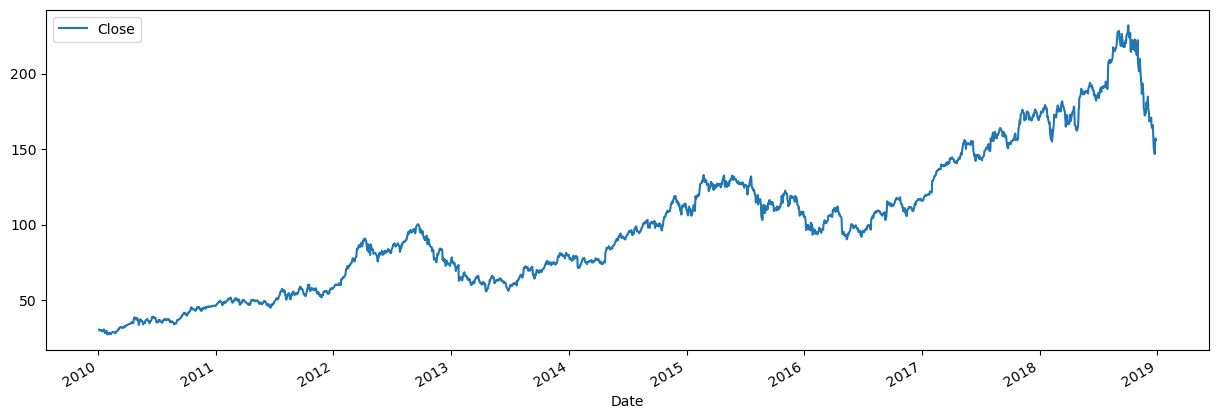

In [44]:
aapl.plot(figsize=(15,5));

In [46]:
Ntest=30
train=ibm.iloc[:-Ntest]
test=ibm.iloc[-Ntest:]

In [47]:
model=pm.auto_arima(train,
                    error_action='ignore',
                   trace=True,
                   suppress_warnings=True,
                    maxiter=10,
                   seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9442.954, Time=4.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9436.082, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9437.603, Time=0.97 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9437.589, Time=1.92 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9434.097, Time=0.43 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9439.637, Time=3.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 11.084 seconds


In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4716.049
Date:                Tue, 31 Oct 2023   AIC                           9434.097
Time:                        06:45:23   BIC                           9439.808
Sample:                             0   HQIC                          9436.183
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         4.0067      0.055     72.559      0.000       3.898       4.115
===================================================================================
Ljung-Box (L1) (Q):                   0.48   Jarque-Bera (JB):              5352.76
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.77
Prob(H) (two-sided):                  0.03   Kurtosis:                        10.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
model.get_params()

{'maxiter': 10,
 'method': 'lbfgs',
 'order': (0, 1, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': False}

In [50]:
def plot_result(model,fulldata,train,test):
    params=model.get_params()
    d=params['order'][1]
    
    train_pred=model.predict_in_sample(start=d,end=-1)
    test_pred,confint=model.predict(n_periods=Ntest,return_conf_int=True)
    
    fig,ax=plt.subplots(figsize=(10,5))
    ax.plot(fulldata.index,fulldata,label='data')
    ax.plot(train.index[d:],train_pred,label='fitted')
    ax.plot(test.index,test_pred,label='forecast')
    ax.fill_between(test.index,\
                   confint[:,0],confint[:,1],\
                   color='red',alpha=0.3)
    ax.legend();

C:\Users\asus\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\asus\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


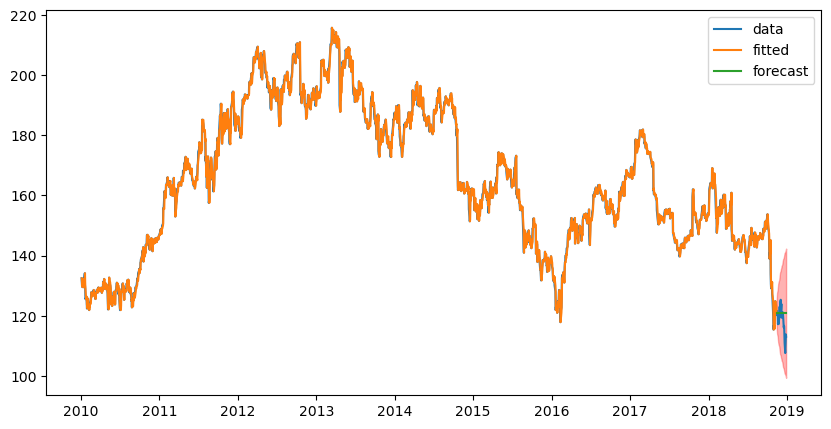

In [51]:
plot_result(model,ibm,train,test)

In [52]:
def plot_test(model,test):
    test_pred,confint=model.predict(n_periods=Ntest,return_conf_int=True)
    fig,ax=plt.subplots(figsize=(10,5))
    ax.plot(test.index,test,label='true')
    ax.plot(test.index,test_pred,label='forecast')
    ax.fill_between(test.index,\
                   confint[:,0],confint[:,1],\
                   color='red',alpha=0.3)
    ax.legend();

C:\Users\asus\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\asus\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


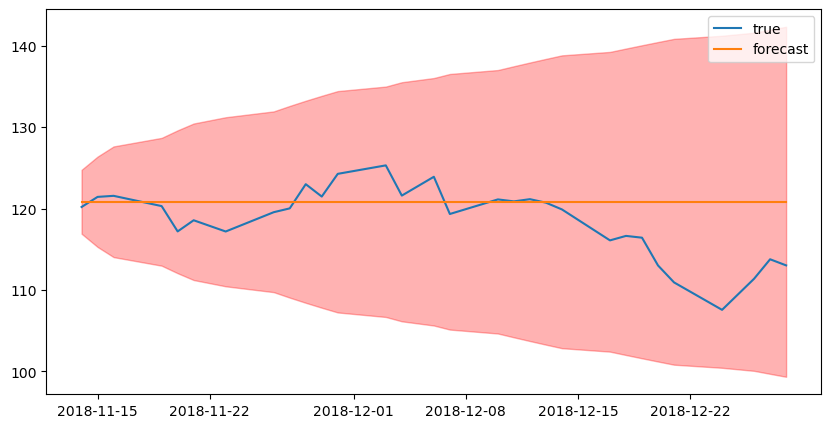

In [53]:
plot_test(model,test)

In [54]:
def rmse(y,t):
    y = np.array(y).flatten()
    t = np.array(t).flatten()
    return np.sqrt(np.mean((t-y)**2))

In [55]:
print('RMSE ARIMA:',rmse(model.predict(Ntest),test))
print('RMSE Naive:',rmse(train.iloc[-1],test))

RMSE ARIMA: 4.763157130051095
RMSE Naive: 4.763157130051095


C:\Users\asus\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\asus\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [56]:
sbux=df[df['Name']=='SBUX'][['Close']].copy()

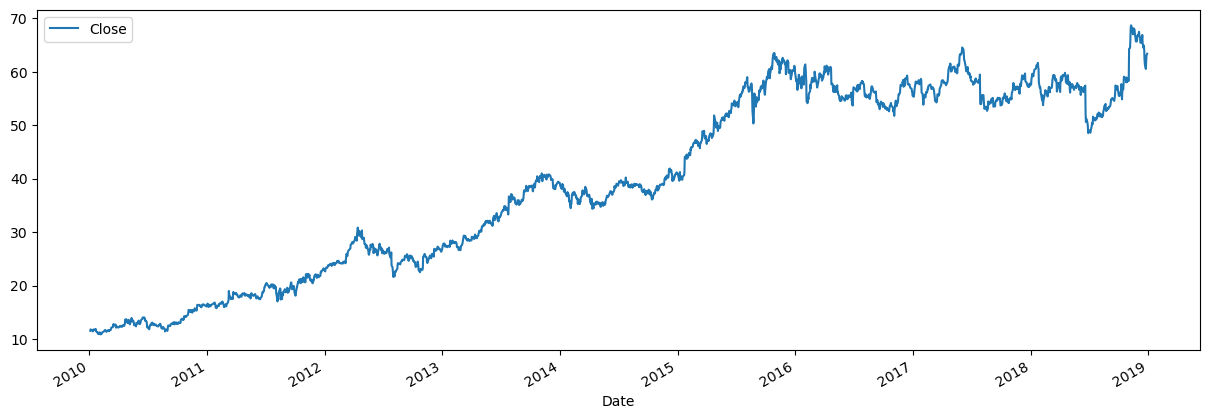

In [57]:
sbux.plot(figsize=(15,5));

In [58]:
Ntest=30
train=sbux.iloc[:-Ntest]
test=sbux.iloc[-Ntest:]

In [59]:
model=pm.auto_arima(train,
                    error_action='ignore',
                   trace=True,
                   suppress_warnings=True,
                    maxiter=10,
                   seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3858.919, Time=4.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3851.895, Time=1.71 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3853.862, Time=1.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3853.860, Time=1.67 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3854.154, Time=0.59 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3855.861, Time=2.21 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 11.591 seconds


In [60]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1923.948
Date:                Tue, 31 Oct 2023   AIC                           3851.895
Time:                        06:50:18   BIC                           3863.317
Sample:                             0   HQIC                          3856.066
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0250      0.012      2.048      0.041       0.001       0.049
sigma2         0.3283      0.003     94.371      0.000       0.321       0.335
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             18901.16
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               3.80   Skew:                            -0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
model.get_params()

{'maxiter': 10,
 'method': 'lbfgs',
 'order': (0, 1, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

In [62]:
def plot_result(model,fulldata,train,test):
    params=model.get_params()
    d=params['order'][1]
    
    train_pred=model.predict_in_sample(start=d,end=-1)
    test_pred,confint=model.predict(n_periods=Ntest,return_conf_int=True)
    
    fig,ax=plt.subplots(figsize=(10,5))
    ax.plot(fulldata.index,fulldata,label='data')
    ax.plot(train.index[d:],train_pred,label='fitted')
    ax.plot(test.index,test_pred,label='forecast')
    ax.fill_between(test.index,\
                   confint[:,0],confint[:,1],\
                   color='red',alpha=0.3)
    ax.legend();

C:\Users\asus\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\asus\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


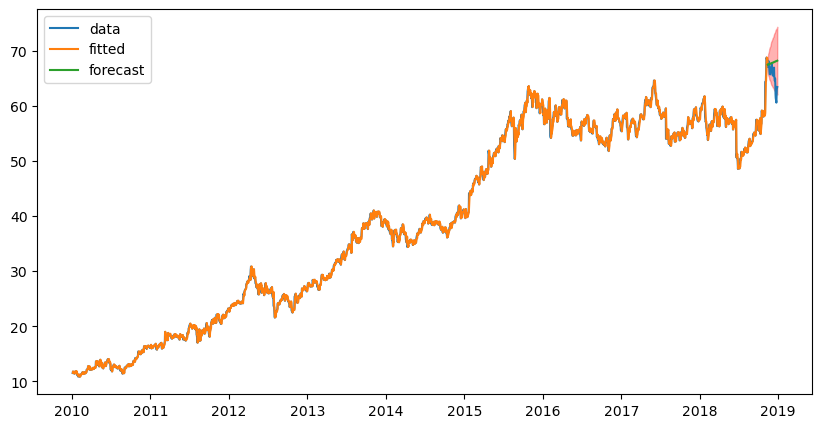

In [64]:
plot_result(model,sbux,train,test)

In [65]:
def plot_test(model,test):
    test_pred,confint=model.predict(n_periods=Ntest,return_conf_int=True)
    fig,ax=plt.subplots(figsize=(10,5))
    ax.plot(test.index,test,label='true')
    ax.plot(test.index,test_pred,label='forecast')
    ax.fill_between(test.index,\
                   confint[:,0],confint[:,1],\
                   color='red',alpha=0.3)
    ax.legend();

C:\Users\asus\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\asus\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


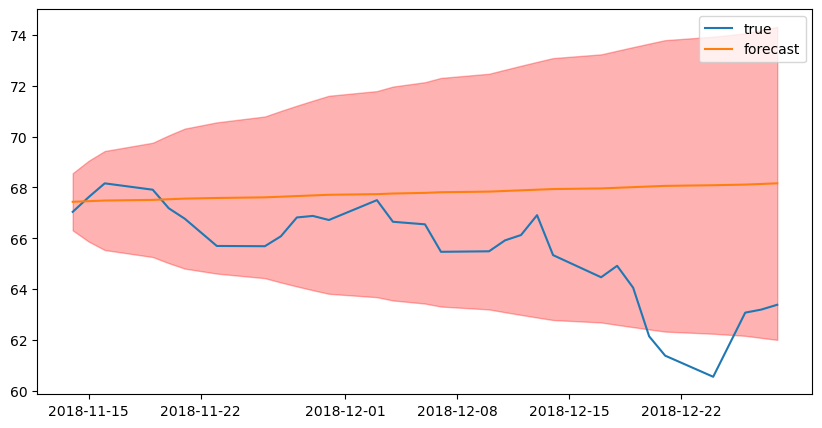

In [66]:
plot_test(model,test)

In [67]:
def rmse(y,t):
    y = np.array(y).flatten()
    t = np.array(t).flatten()
    return np.sqrt(np.mean((t-y)**2))

In [68]:
print('RMSE ARIMA:',rmse(model.predict(Ntest),test))
print('RMSE Naive:',rmse(train.iloc[-1],test))

RMSE ARIMA: 3.094903477837591
RMSE Naive: 2.6889385763409135


C:\Users\asus\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\asus\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
